In [4]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Auto reload of library
%reload_ext autoreload
%autoreload 2

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

from import_KK import *
DeviceStrategy_CPU()
from data_KK import *
from description_KK import *
from preprocessing_KK import *
from preprocessing_text_KK import * ##
from algorithm_textmining_KK import * ##
from evaluation_KK import *
from visualization_KK import *

FONT_NAME = 'malgun'
plt.rc('font', family=FONT_NAME) 
plt.rcParams['font.family'] = FONT_NAME
mpl.rc('font', family=FONT_NAME)
sns.set(font=FONT_NAME) 
sys_font = font_manager.findSystemFonts()
FONT_PATHS = [path for path in sys_font if 'malgun' in path]
if len(FONT_PATHS) != 0:
    rc('font', family=font_manager.FontProperties(fname=FONT_PATHS[0]).get_name())

Cuda is Ready?  False

Tensorflow Version:  2.18.0
Keras Version:  3.7.0
Torch Version:  2.5.1+cpu


# Hyperparameters

In [5]:
# 데이터 파라미터
SEARCH_KEYWORD = ['elder neglect', 'neglect', 'abuse', 'elder abuse', 'older adults', 'abuse neglect']
SOURCE_NAME = 'abstract_yj_20250221.xlsx'
TARGET = 'Title+Abstract'
# TARGET = 'title'
CATEGORY = 'Category'
# 전처리모델 파라미터
STOPWORDS = []
NGRAM_RANGE = (1,2)
TFIDF_MAXCOL = 10000
TFIDF_DELLOWFREQ = False
RAY = True
KEYBERT_TOPNKWD = 5
WINDOW_SIZE = 1
NUM_SHOWKEYWORD = 100
# 모델링 파라미터
# TOKENIZER = 'TF-IDF'
TOKENIZER = 'KeyBERT'
# euclidean, manhattan, chebyshev, minkowski, canberra, braycurtis, mahalanobis, wminkowski, seuclidean, cosine, correlation
# haversine, hamming, jaccard, dice, russelrao, kulsinski, ll_dirichlet, hellinger, rogerstanimoto, sokalmichener, sokalsneath, yule
UMAP_METRIC = 'euclidean'
UMAP_SEED = 123
NUM_TOPICS = 'auto'
NUM_TOPICWORDS = 10
NUM_TOPICSAMPLES = 5
# 저장
SAVE_LOCAL = True
SAVE_NAME_PREP = 'wordfreq'
SAVE_NAME_LDA = 'Topics_Token('+str(NGRAM_RANGE[0])+'-'+str(NGRAM_RANGE[1])+')_byLDA.xlsx'

# Preprocessing

In [20]:
# # Data Loading
# df = pd.read_excel(os.path.join(os.getcwd(), 'Data', SOURCE_NAME), index_col=0)
# df.Category = df.Category.apply(lambda x: str(x).lower())
# df[TARGET] = df.Title + " " + df.Abstract
# df[TARGET+'_Prep'] = df[TARGET].progress_apply(lambda x: text_preprocessor(x, del_number=False, 
#                                                                            del_bracket_content=False,
#                                                                            stop_words=STOPWORDS))
# df.to_csv(os.path.join(os.getcwd(), 'Data', SOURCE_NAME.split('.')[0]+'.csv'), index=False, encoding='utf-8-sig')


00%|███████████████████████████████████████████████████████████████████████████████| 531/531 [00:01<00:00, 358.05it/s]

In [58]:
# ## 단어빈도 추출과 변환
# ### 데이터로딩
# df = pd.read_csv(os.path.join(os.getcwd(), 'Data', SOURCE_NAME.split('.')[0]+'.csv'), encoding='utf-8-sig')
# ### 빈도추출
# word_freq, wordadj_freq, df_freq = preprocessing_wordfreq(df, colname_target=TARGET+'_Prep', colname_category=None, language='kr',
#                                                           ngram_range=NGRAM_RANGE,
#                                                           tfidf_maxcol=TFIDF_MAXCOL, tfidf_dellowfreq=TFIDF_DELLOWFREQ,
#                                                           keybert_topnkwd=KEYBERT_TOPNKWD,
#                                                           num_showkeyword=NUM_SHOWKEYWORD, 
#                                                           save_local=SAVE_LOCAL, save_name=SAVE_NAME_PREP)
# df_freq.to_csv(os.path.join(os.getcwd(), 'Data', SOURCE_NAME.split('.csv')[0]+'_prep_'+str(NGRAM_RANGE).replace(' ','')+'.csv'), 
#                index=False, encoding='utf-8-sig')
# ### 카테고리 기반 빈도추출
# word_freq_categ, wordadj_freq_categ, df_freq_categ = preprocessing_wordfreq(df, colname_target=TARGET+'_Prep', colname_category=CATEGORY, language='kr',
#                                                                             ngram_range=NGRAM_RANGE,
#                                                                             tfidf_maxcol=TFIDF_MAXCOL, tfidf_dellowfreq=TFIDF_DELLOWFREQ,
#                                                                             keybert_topnkwd=KEYBERT_TOPNKWD,
#                                                                             num_showkeyword=NUM_SHOWKEYWORD, 
#                                                                             save_local=SAVE_LOCAL, save_name=SAVE_NAME_PREP)
# df_freq_categ.to_csv(os.path.join(os.getcwd(), 'Data', SOURCE_NAME.split('.csv')[0]+'_prepcateg_'+str(NGRAM_RANGE).replace(' ','')+'.csv'), 
#                      index=False, encoding='utf-8-sig')
# ### 동시발생 단어행렬 추출
# df_cowordd, df_cowordp = preprocessing_sent2edgelist(df_freq[TARGET+'_Prep'], 
#                                                      window_size=WINDOW_SIZE, save_local=SAVE_LOCAL)
# df_cowordd_categ, df_cowordp_categ = preprocessing_sent2edgelist_bycateg(df_freq, 
#                                                                          colname_target=TARGET+'_Prep', colname_categ=CATEGORY, 
#                                                                          window_size=WINDOW_SIZE, save_local=SAVE_LOCAL)


Preprocessing...: SoyNLP 2025-02-21 20:49:17.090419
training was done. used memory 1.264 Gby 1.263 Gb
all cohesion probabilities was computed. # words = 11632
all branching entropies was computed # words = 12529
all accessor variety was computed # words = 12529
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 10418
_noun_scores_ 0
after postprocessing 0
Preprocessing...: TF-IDF 2025-02-21 20:49:22.540057
Preprocessing...: KeyBERT 2025-02-21 20:49:23.937040
Sentence to Keywords...: 2025-02-21 20:52:54.005248



100%|███████████████████████████████████████████████████████████████████████████████| 531/531 [00:01<00:00, 339.34it/s]

Saving...: 2025-02-21 20:52:57.017187
Results Concat!: 2025-02-21 20:52:57.037194


,Token by SoyNLP,Token by TF-IDF,Token by KeyBERT,Token(ADJ) by SoyNLP,Token(ADJ) by TF-IDF,Token(ADJ) by KeyBERT
Length,0,10000,2230,0,8983,116


,word,score,word,score,word,score
0,NaN,NaN,abuse,39,elder abuse,42
1,NaN,NaN,elder,27,older women,7
2,NaN,NaN,elder abuse,23,elder mistreatment,7
3,NaN,NaN,older,19,nursing homes,6
4,NaN,NaN,neglect,14,elderly abuse,4
5,NaN,NaN,care,14,abuse screening,4
6,NaN,NaN,mistreatment,12,abuse nursing,4
7,NaN,NaN,adults,12,abuse elderly,3
8,NaN,NaN,older adults,11,covid19 pandemic,3
9,NaN,NaN,study,11,abuse older,3


  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

Preprocessing...: SoyNLP 2025-02-21 20:52:57.077704
training was done. used memory 1.508 Gby 1.508 Gb
all cohesion probabilities was computed. # words = 5428
all branching entropies was computed # words = 6063
all accessor variety was computed # words = 6063
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 5092
_noun_scores_ 0
after postprocessing 0
Preprocessing...: TF-IDF 2025-02-21 20:52:58.368186
Preprocessing...: KeyBERT 2025-02-21 20:52:58.735637


 25%|█████████████████████                                                               | 1/4 [00:58<02:54, 58.23s/it]

Preprocessing...: SoyNLP 2025-02-21 20:53:55.311115
training was done. used memory 1.692 Gb1.692 Gb
all cohesion probabilities was computed. # words = 425
all branching entropies was computed # words = 661
all accessor variety was computed # words = 661
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 473
_noun_scores_ 0
after postprocessing 0
Preprocessing...: TF-IDF 2025-02-21 20:53:55.382211
Preprocessing...: KeyBERT 2025-02-21 20:53:55.439688


 50%|██████████████████████████████████████████                                          | 2/4 [01:03<00:54, 27.02s/it]

Preprocessing...: SoyNLP 2025-02-21 20:54:00.488571
training was done. used memory 1.860 Gby 1.860 Gb
all cohesion probabilities was computed. # words = 5505
all branching entropies was computed # words = 6330
all accessor variety was computed # words = 6330
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 5197
_noun_scores_ 0
after postprocessing 0
Preprocessing...: TF-IDF 2025-02-21 20:54:02.748905
Preprocessing...: KeyBERT 2025-02-21 20:54:03.146182


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [02:04<00:42, 42.71s/it]

Preprocessing...: SoyNLP 2025-02-21 20:55:01.864031
training was done. used memory 1.494 Gby 1.494 Gb
all cohesion probabilities was computed. # words = 7695
all branching entropies was computed # words = 8468
all accessor variety was computed # words = 8468
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 7029
_noun_scores_ 0
after postprocessing 0
Preprocessing...: TF-IDF 2025-02-21 20:55:04.142151
Preprocessing...: KeyBERT 2025-02-21 20:55:04.708956



00%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:45<00:00, 56.37s/it]

Sentence to Keywords...: 2025-02-21 20:56:42.555927




00%|███████████████████████████████████████████████████████████████████████████████| 531/531 [00:01<00:00, 300.85it/s]

Saving...: 2025-02-21 20:56:49.257674
Results Concat!: 2025-02-21 20:56:49.314675


,Token by SoyNLP,Token by TF-IDF,Token by KeyBERT,Token(ADJ) by SoyNLP,Token(ADJ) by TF-IDF,Token(ADJ) by KeyBERT
Length,0,31143,2351,0,19557,152


,category,word,score,category,word,score,category,word,score
0,NaN,NaN,NaN,health/care,abuse,10,health/care,elder abuse,8
1,NaN,NaN,NaN,health/care,elder,5,health/care,chinese elderly,1
2,NaN,NaN,NaN,health/care,elder abuse,5,health/care,abuse elderly,1
3,NaN,NaN,NaN,health/care,older,4,health/care,elder mistreatment,1
4,NaN,NaN,NaN,health/care,neglect,3,health/care,communitydwelling older,1
5,NaN,NaN,NaN,health/care,care,3,health/care,communitydwelling chinese,1
6,NaN,NaN,NaN,health/care,study,3,health/care,abuse nursing,1
7,NaN,NaN,NaN,health/care,mistreatment,2,health/care,abuse screening,1
8,NaN,NaN,NaN,health/care,elderly,2,health/care,older patients,1
9,NaN,NaN,NaN,health/care,health,2,health/care,study chinese,1


sentence to cooccurent matrix...



00%|██████████████████████████████████████████████████████████████████████████████| 531/531 [00:00<00:00, 6637.11it/s]

Saving...: 2025-02-21 20:56:49.506775
sentence to cooccurent matrix...
Progress..:  25.0 %
sentence to cooccurent matrix...



00%|██████████████████████████████████████████████████████████████████████████████| 139/139 [00:00<00:00, 6944.71it/s]

Progress..:  50.0 %
sentence to cooccurent matrix...



00%|██████████████████████████████████████████████████████████████████████████████| 257/257 [00:00<00:00, 7136.19it/s]

Progress..:  75.0 %
sentence to cooccurent matrix...



00%|██████████████████████████████████████████████████████████████████████████████| 127/127 [00:00<00:00, 5894.01it/s]

Progress..:  100.0 %
sentence to cooccurent matrix...



00%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 7998.67it/s]

Saving...: 2025-02-21 20:56:49.819452


In [6]:
# 데이터로딩: 원본
df_freq = pd.read_csv(os.path.join('.', 'Data', SOURCE_NAME.split('.csv')[0]+'_prep_'+str(NGRAM_RANGE).replace(' ','')+'.csv'), encoding='utf-8-sig')
df_freq_categ = pd.read_csv(os.path.join('.', 'Data', SOURCE_NAME.split('.csv')[0]+'_prepcateg_'+str(NGRAM_RANGE).replace(' ','')+'.csv'), encoding='utf-8-sig')
word_freq = pd.read_csv(os.path.join('.', 'Result', 'WordFreq', 'wordfreq_'+TOKENIZER.lower()+'.csv'), encoding='utf-8-sig')
wordadj_freq = pd.read_csv(os.path.join('.', 'Result', 'WordFreq', 'wordfreq_'+TOKENIZER.lower()+'adj.csv'), encoding='utf-8-sig')
word_freq_categ = pd.read_csv(os.path.join('.', 'Result', 'WordFreq', 'wordfreqcateg_'+TOKENIZER.lower()+'.csv'), encoding='utf-8-sig')
wordadj_freq_categ = pd.read_csv(os.path.join('.', 'Result', 'WordFreq', 'wordfreqcateg_'+TOKENIZER.lower()+'adj.csv'), encoding='utf-8-sig')
coword_direct = pd.read_csv(os.path.join('.', 'Result', 'WordFreq', 'wordcooccurrent_directel.csv'), encoding='utf-8-sig', index_col=0)
coword_pair = pd.read_csv(os.path.join('.', 'Result', 'WordFreq', 'wordcooccurrent_pairel.csv'), encoding='utf-8-sig', index_col=0)
coword_direct_categ = pd.read_csv(os.path.join('.', 'Result', 'WordFreq', 'wordcooccurrent_directel_categ.csv'), encoding='utf-8-sig', index_col=0)
coword_pair_categ = pd.read_csv(os.path.join('.', 'Result', 'WordFreq', 'wordcooccurrent_pairel_categ.csv'), encoding='utf-8-sig', index_col=0)

# Result Summary

## Data Trend

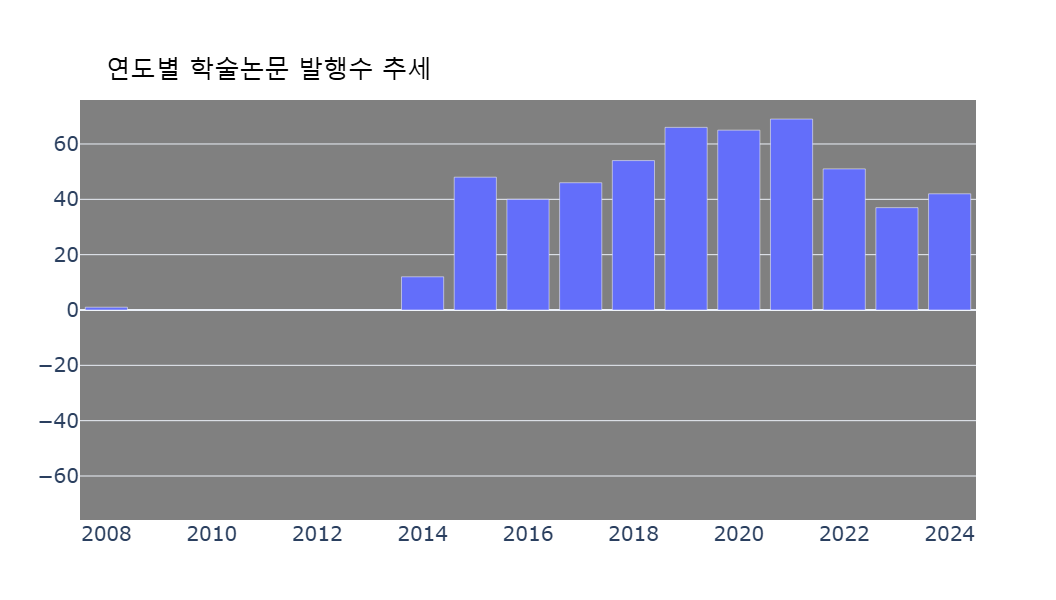

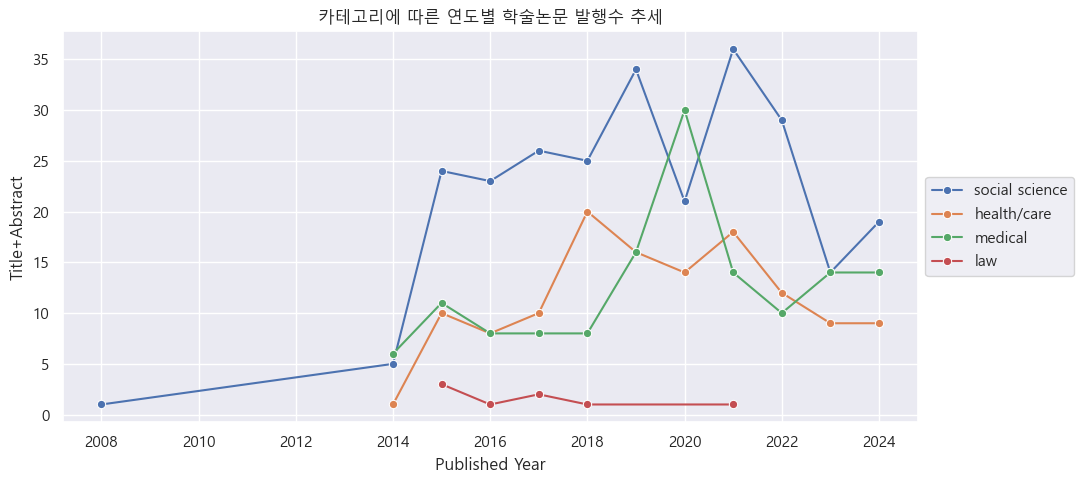

In [9]:
# 데이터 추세
## 연도별 학술논문 발행수 추세 
plot_bar(df_freq.groupby('Published Year').count()[[TARGET]], title='연도별 학술논문 발행수 추세', save_local=False)
## 연도별 학술분야별 발행수 추세
df_plot = df_freq.groupby(['Published Year', 'Category']).count()[[TARGET]].reset_index()
fig = plt.figure(figsize=(11, 5))
sns.lineplot(df_plot, x='Published Year', y=TARGET, hue='Category', marker='o')
plt.title('카테고리에 따른 연도별 학술논문 발행수 추세')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## Keword Distribution

,count,mean,std,min,25%,50%,75%,max
Length,531.0000,124.9209,49.0682,30.0000,95.0000,114.0000,152.0000,590.0000


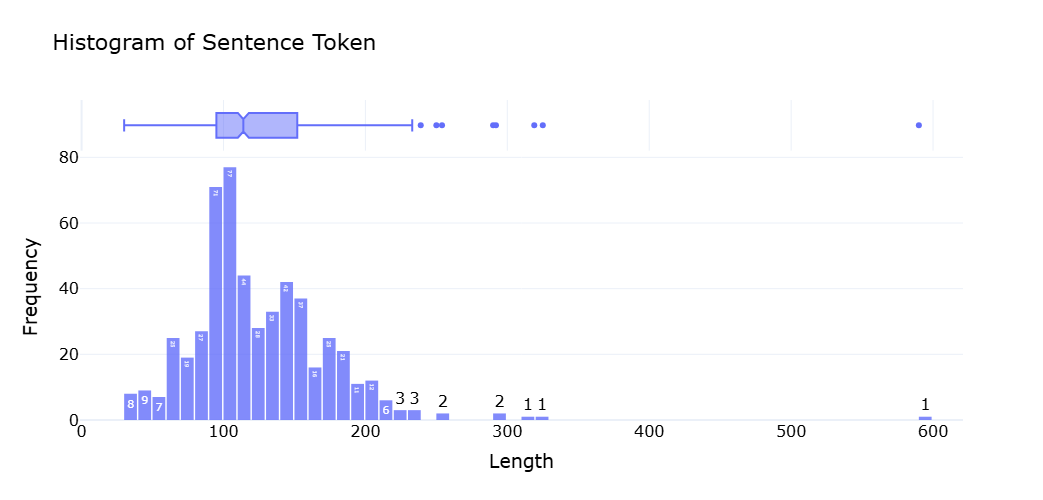

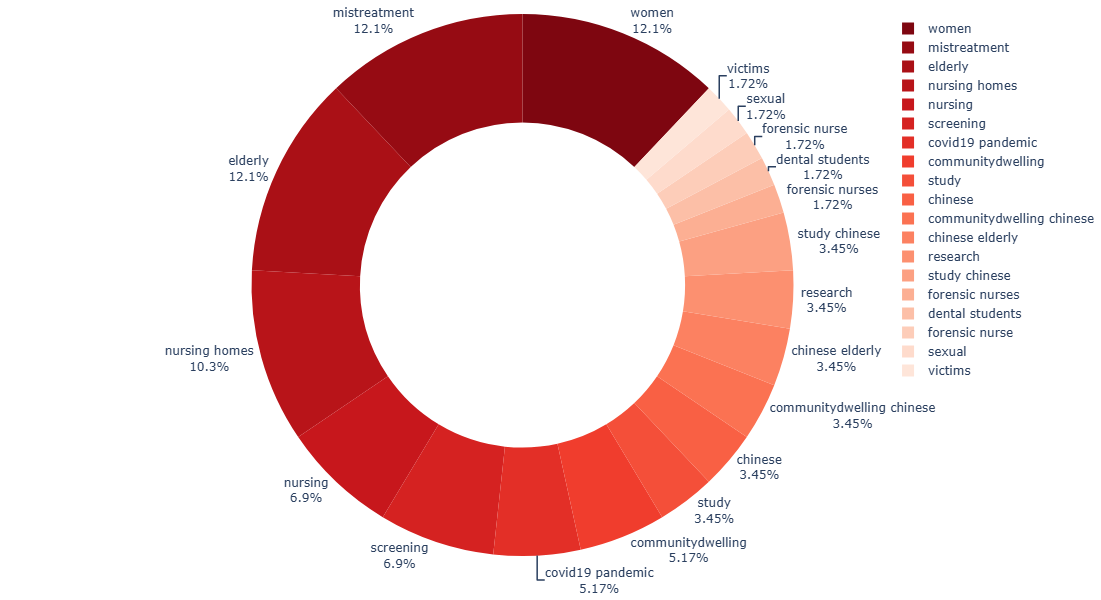

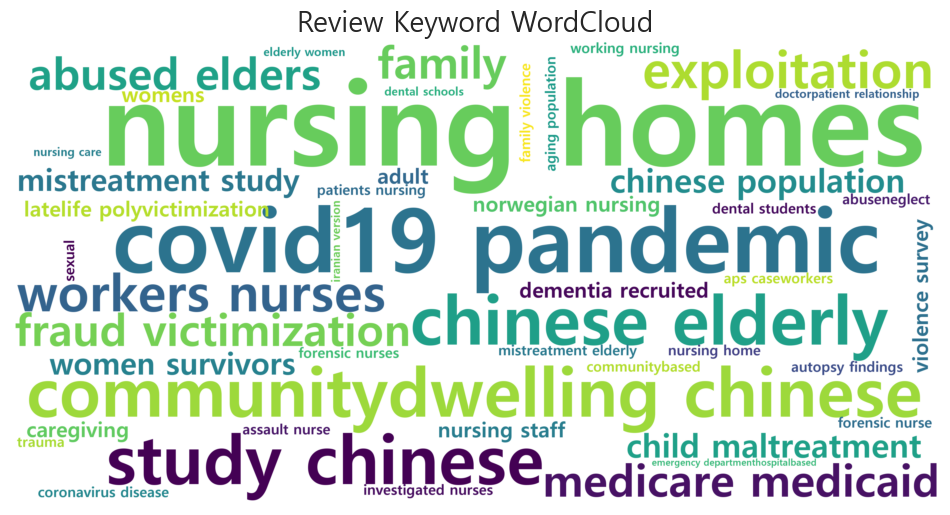

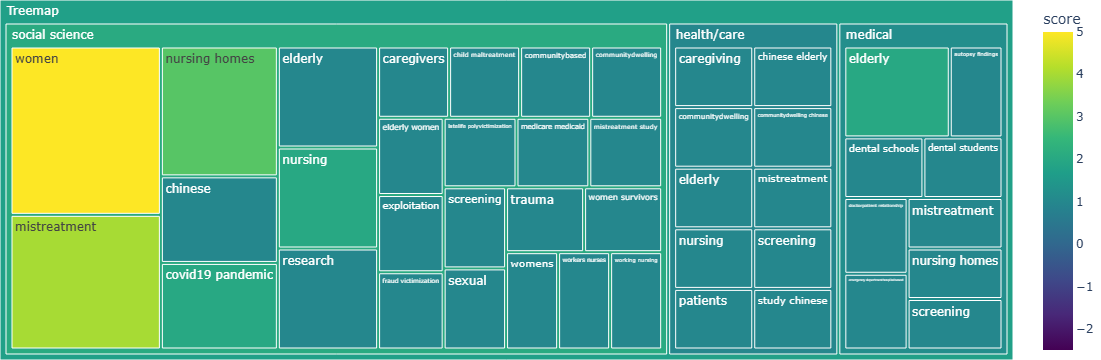

In [81]:
# 키워드 분포
## 리뷰문장 토큰 길이 분포
plot_histogram_senttoken(df_freq['Token_'+TOKENIZER]) 
## 전체기간 주요키워드 분포
word_freq_filter = word_freq.word.apply(lambda x: [word for word in x.split() if word not in [word for keyword in SEARCH_KEYWORD for word in keyword.split()]])
word_freq_filter = pd.DataFrame(word_freq_filter.apply(lambda x: ' '.join(x))).replace('', np.nan)
word_freq_filter = pd.concat([pd.DataFrame(word_freq_filter), word_freq.score], axis=1)
filter_array = ~word_freq_filter.word.isnull().values.flatten()
plot_donut_wordfreq(word_freq_filter[filter_array], num_showkeyword=20)
plot_wordcloud(word_freq_filter[filter_array], title='Review Keyword WordCloud', max_font_size=50, save_local=False)
## 연도별(리뷰) 주요키워드 분포
word_freq_filter = word_freq_categ.word.apply(lambda x: [word for word in x.split() if word not in [word for keyword in SEARCH_KEYWORD for word in keyword.split()]])
word_freq_filter = pd.DataFrame(word_freq_filter.apply(lambda x: ' '.join(x))).replace('', np.nan)
word_freq_filter = pd.concat([word_freq_categ.category, pd.DataFrame(word_freq_filter), word_freq_categ.score], axis=1)
filter_array = ~word_freq_filter.word.isnull().values.flatten()
plot_treemap_wordfreq(word_freq_filter[filter_array])

Analysis...


100%|██████████████████████████████████████████████████████████████████████████| 1345/1345 [00:00<00:00, 673030.17it/s]

Number of Nodes: 1345
Number of Edges: 1827


,word,degree of centality,betweenness of centality,closeness of centality,eigenvector of centality,page rank,clustering coefficient
0,abuse,0.6808,0.0060,0.0047,0.2113,0.0009,0.0009
1,mistreatment,0.1786,0.0010,0.0034,0.1854,0.0009,0.0061
2,elderly,0.0975,0.0011,0.0041,0.1682,0.0008,0.0124
3,women,0.0945,0.0016,0.0039,0.1304,0.0008,0.0104
4,older,0.0789,0.0028,0.0053,0.1002,0.0008,0.0150
5,homes,0.0751,0.0010,0.0026,0.1289,0.0009,0.0019
6,screening,0.0565,0.0005,0.0031,0.1246,0.0008,0.0211
7,elder,0.0454,0.0005,0.0041,0.0584,0.0008,0.0364
8,pandemic,0.0394,0.0001,0.0035,0.0332,0.0008,0.0098
9,nursing,0.0275,0.0003,0.0037,0.1048,0.0008,0.0113


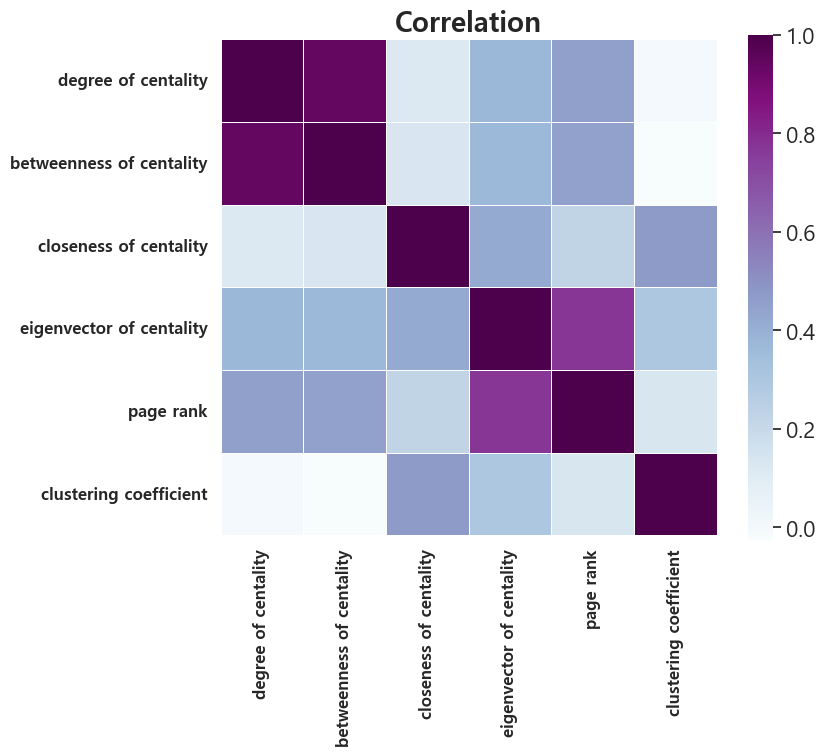

Saving...: 2025-02-21 22:35:54.454257


In [115]:
# 동시출현 단어네트워크
coword_sub = coword_direct_categ[coword_direct_categ.source.isin([word for row in word_freq.word[:10] for word in row.split()])].reset_index().iloc[:,1:]
G, node_stat = preprocessing_GraphNX(coword_sub, direct=True)

In [117]:
for col in node_stat.columns[1:]:
    ## 하위그룹
    top_nodes = node_stat.sort_values(by=col, ascending=False).word[:50]
    G_sub = G.subgraph(top_nodes)

    ## 동시출현 시각화
    net = Network(notebook=True)
    net.from_nx(G_sub)
    net.show_buttons(filter_=['physics'])
    net.toggle_physics(False)
    net.show('network_'+col+'.html')

network_degree of centality.html
network_betweenness of centality.html
network_closeness of centality.html
network_eigenvector of centality.html
network_page rank.html
network_clustering coefficient.html


## Topic Analysis

2025-02-21 22:44:44,126	INFO worker.py:1619 -- Calling ray.init() again after it has already been called.


Optimal Topic Number:  5


[Kss]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


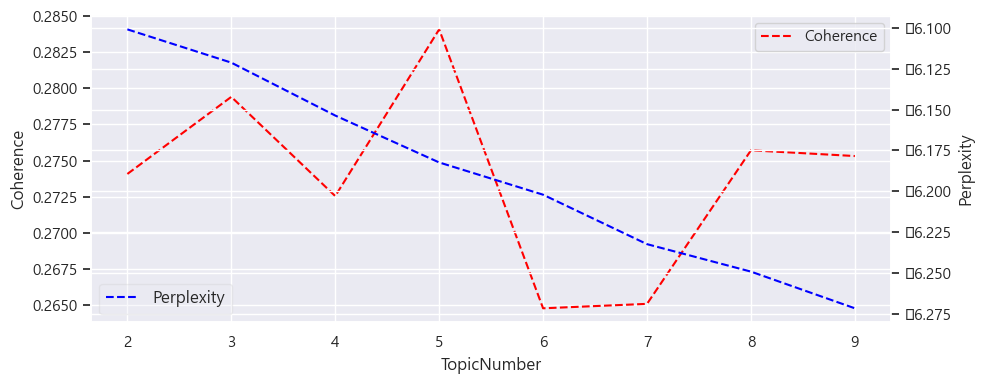

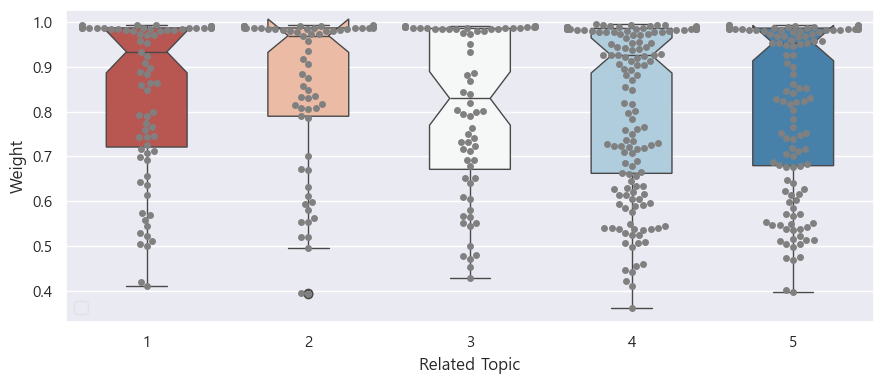

,Related Keywords,Number of Sentences,Percentage,Average Probability
Topic 1,"'care(17.7%)', 'abuse(14.6%)', 'older(13.6%)', 'elder(11.6%)', 'neglect(8.1%)', 'study(7.6%)', '...",79,0.1488,0.8076
Topic 2,"'abuse(19.0%)', 'older(15.7%)', 'study(10.5%)', 'elder(10.0%)', 'neglect(10.0%)', 'health(8.6%)'...",69,0.1299,0.8254
Topic 3,"'abuse(27.7%)', 'elder(19.9%)', 'care(13.1%)', 'mistreatment(7.8%)', 'study(6.8%)', 'older(5.3%)...",68,0.1281,0.8347
Topic 4,"'abuse(30.0%)', 'elder(20.7%)', 'older(14.5%)', 'neglect(6.6%)', 'adults(6.6%)', 'study(5.3%)', ...",167,0.3145,0.8435
Topic 5,"'abuse(31.4%)', 'elder(18.3%)', 'neglect(10.9%)', 'study(7.9%)', 'adults(6.6%)', 'elderly(6.6%)'...",148,0.2787,0.8532


,Topic Number,Weight,Title+Abstract_Prep
10,Topic 1,0.9937,abuse neglect older people health facilities perspective nursing professionals crosssectional st...
468,Topic 1,0.9934,healthcare professionals perceptions neglect older people mexico qualitative secondary analysis ...
207,Topic 1,0.9930,ethical challenges nursing homesstaffs opinions experiences systematic ethics meetings participa...
78,Topic 1,0.9917,contrasting vantage points caregivers residents perception elder abuse neglect longterm care eld...
522,Topic 1,0.9916,factors affecting perceptions maltreatment care workers case japanese longterm care facilities s...
177,Topic 2,0.9925,mechanisms underlying use abusive neglectful behaviors dementia caregiving role caregiver mental...
502,Topic 2,0.9924,history childhood mistreatment psychological health consequences covid19 older adults examine as...
270,Topic 2,0.9924,sexual violence older adults belgian prevalence study sexual violence sv important public health...
429,Topic 2,0.9917,prevalence correlates elder neglect communitydwelling chinese population new evidence clhls stud...
336,Topic 2,0.9916,sexually assault 80yearold woman barriers exploring exposing sexual assault women late life phen...


In [118]:
# LDA
topic_kw_LDA, topic_doc_LDA, \
doc_topic_LDA, model_LDA = modeling_LDA(df_freq['Token_'+TOKENIZER], df_freq[TARGET+'_Prep'],
                                        num_topics=NUM_TOPICS, num_topicwords=NUM_TOPICWORDS, num_topicsamples=NUM_TOPICSAMPLES,
                                        save_local=SAVE_LOCAL, save_name=SAVE_NAME_LDA)
display(topic_kw_LDA, topic_doc_LDA)

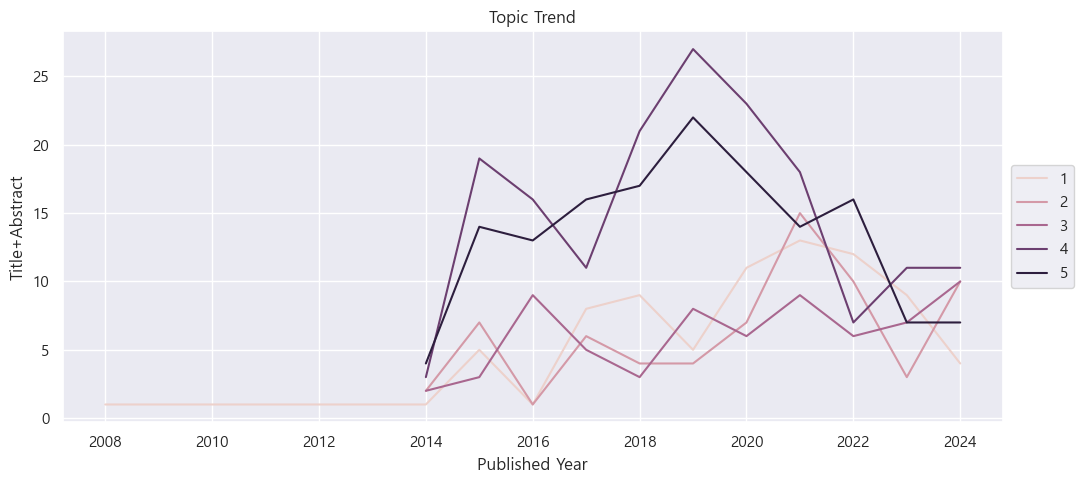

In [145]:
# 데이터결합: 원본+토픽결과
df_total = pd.concat([df_freq, doc_topic_LDA.iloc[:,1:]], axis=1)

## 연도별 Hot & Cold 토픽수 변화
df_plot = df_total.groupby(['Published Year', 'Related Topic'])[TARGET].count().reset_index()
fig = plt.figure(figsize=(11, 5))
sns.lineplot(df_plot, x='Published Year', y='Title+Abstract', hue='Related Topic')
plt.title('Topic Trend')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# ## 연도별 Hot & Cold 토픽확률분포 시각화
# df_plot = df_total.groupby(['Published Year', 'Related Topic'])['Weight'].mean().reset_index()
# fig = plt.figure(figsize=(11, 5))
# sns.lineplot(df_plot, x='Published Year', y='Weight', hue='Related Topic')
# plt.title('Topic Trend')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.tight_layout()
# plt.show()
